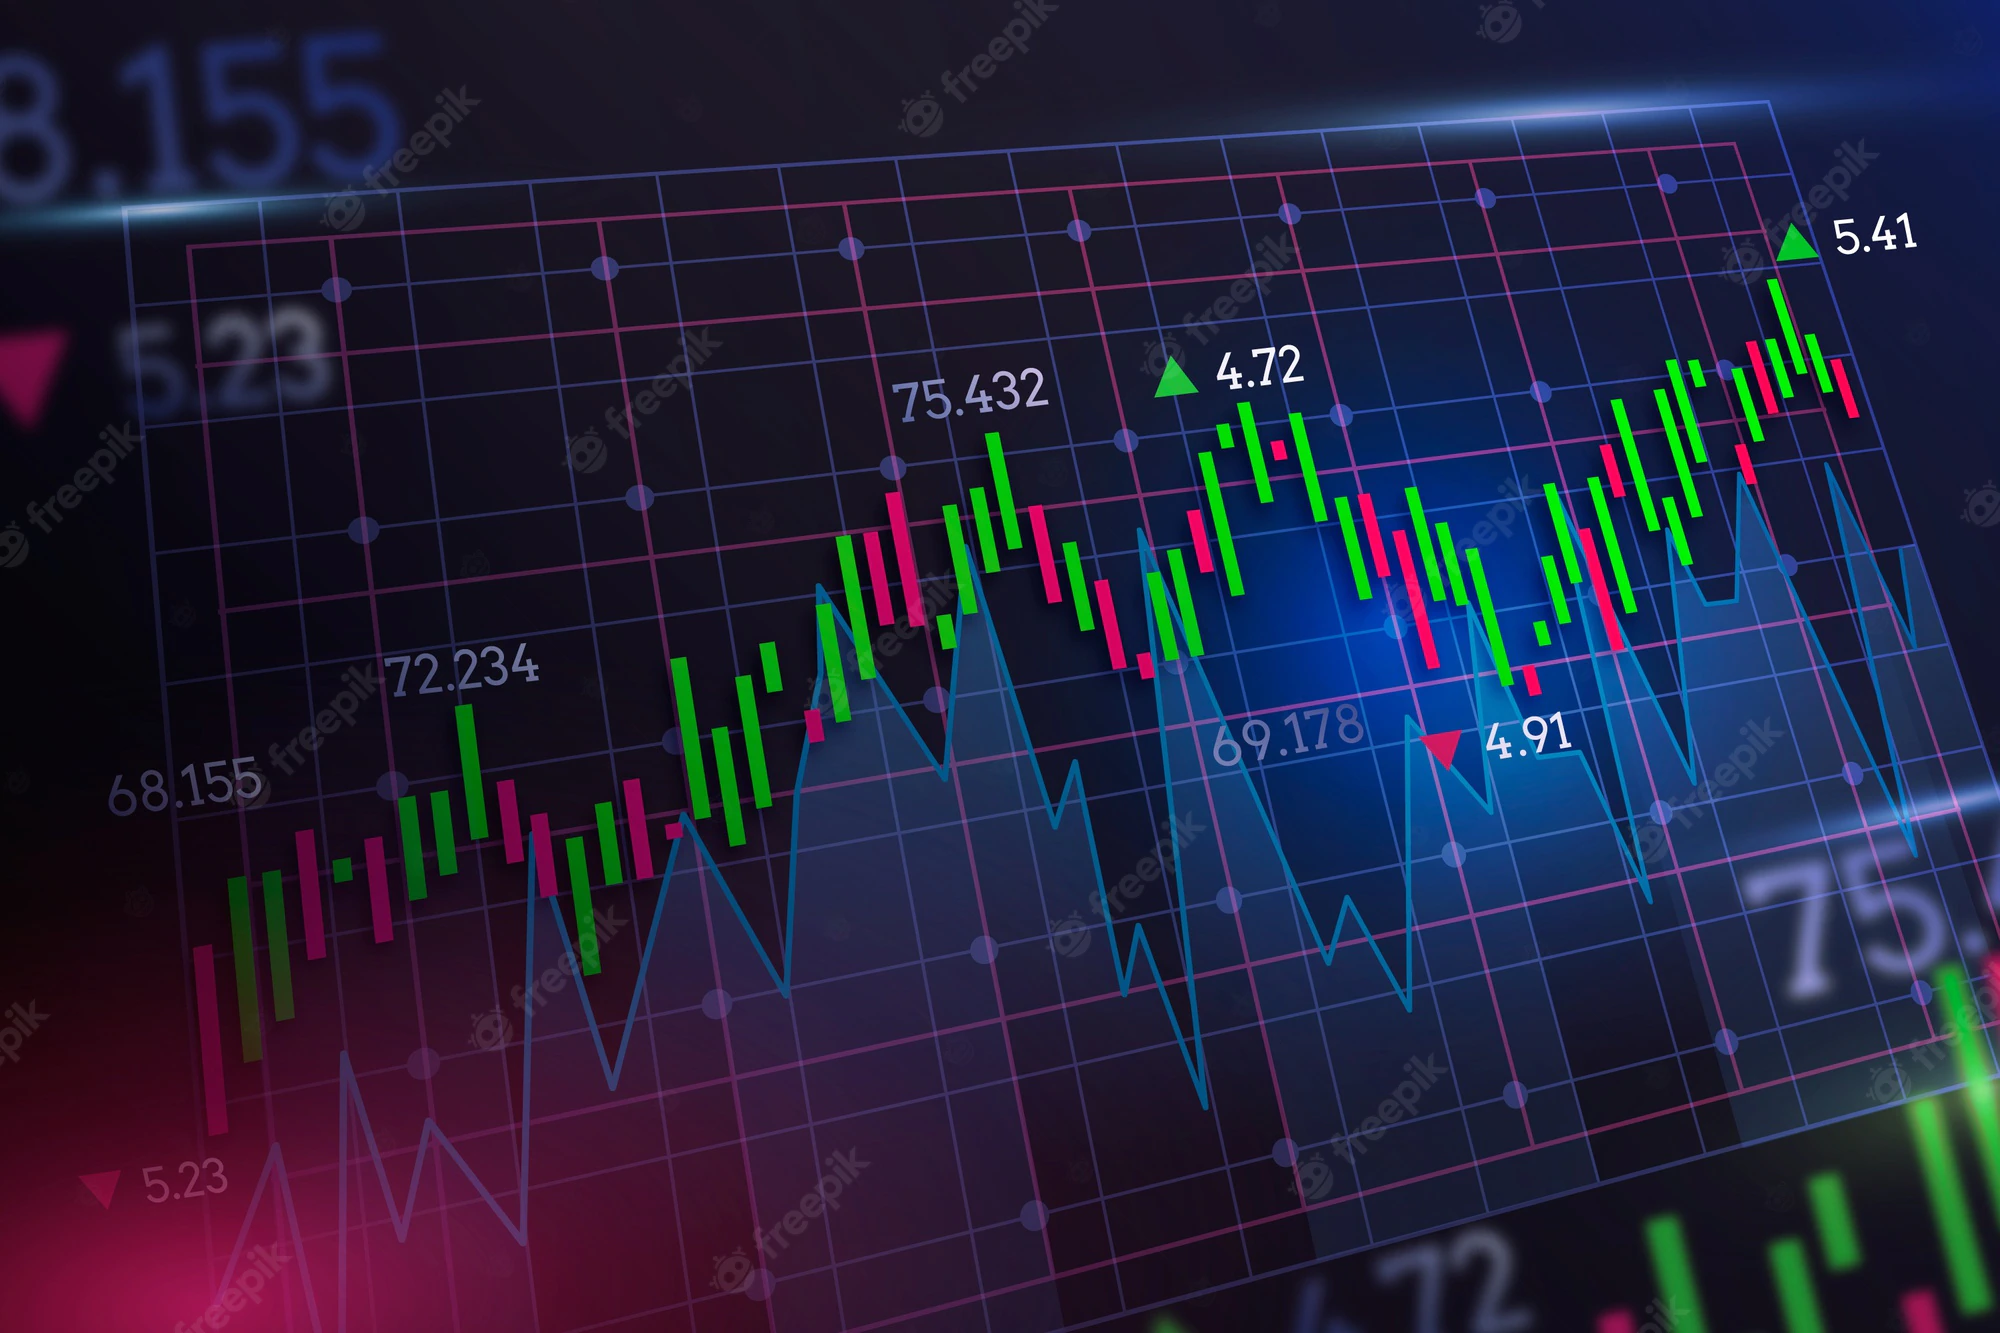

# Prediction of Stock Price Direction

## Assignment 
Predict the day price direction of Amazon.com, Inc. (AMZN) stock.

To be profitable, we need to predict the price direction of the stock: whether it will be higher or lower than the price today. 

The target would be a binary classification whether the next day closing price will be higher than the opening price.

## Data Description
Data from 1997 up to 2020 that has been split into training (1997-2016), validation (2016-2018), and testing (2018-2020) periods. The data is available in AMZN_train.csv, AMZN_val.csv, and AMZN_test.csv files respectively.

Each dataset has the same format with the following 7 columns:
- `Date` - in format `YYYY-MM-DD`
- `Open` - stock price upon opening of an exchange
- `High` - the highest stock price on a given day
- `Low` - the lowest stock price on a given day
- `Close` - stock price at the end of a trading day
- `Adj Close` - adjusted closing price that takes into account corporate actions
- `Volume` - the amount of shares traded over the course of a trading day

# Data Exploration
Load data sets and see what data attributes are available. Plot the variables to see if we can find some trends in the data and explore feature engineering. Data loading anad analysis will be done in pandas.

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("AMZN_train.csv")

In [3]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200


In [4]:
df_train.shape

(4781, 7)

4781 rows and 7 columns.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


Mostly numerical columns (5 floats, 1 int) and an object column for `Date`. No null values.

In [6]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [7]:
# get the first and last date of the data set respectively
df_train["Date"].min(), df_train["Date"].max()

('1997-05-15', '2016-05-13')

#### Let's plot the stock price as a function of time by: 
- passing the `Date` column as an argument for the x-axis and the 
- closing, opening, highest and lowest price for the y-axis.  

<AxesSubplot:xlabel='Date'>

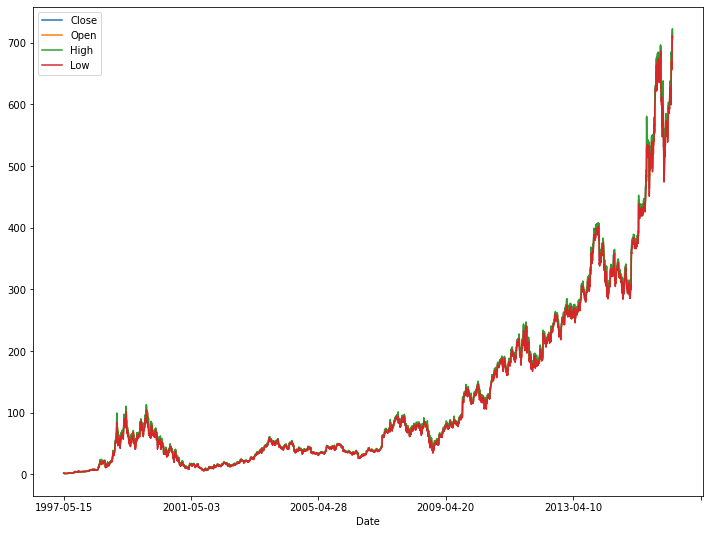

In [8]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12, 9)
df_train.plot(x="Date", y=["Close", "Open", "High", "Low"])

The prices are mainly overlapping with one another and has grown significantly over the years, starting at around $100 at the beginning of the century and rising to almost \\$700 13 years later.

I want to repeat the same analysis for the validation and testing set, to make sure that they follow a similar distribution and that there are no surprises/errors.

In [9]:
# created a function so I don't have to rewrite the same code
def analyse(dataframe):
    """Runs an exploration analysis of the dataframe."""
    print("Shape", dataframe.shape, "\n")
    print("Columns", dataframe.columns, "\n")
    dataframe.info()
    print("\n", dataframe.describe(), "\n")
    print("The data ranges from", dataframe["Date"].min(), "to", dataframe["Date"].max())
    dataframe.plot(x="Date", y=["Close", "Open", "High", "Low"])

Shape (503, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       503 non-null    object 
 1   Open       503 non-null    float64
 2   High       503 non-null    float64
 3   Low        503 non-null    float64
 4   Close      503 non-null    float64
 5   Adj Close  503 non-null    float64
 6   Volume     503 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.6+ KB

               Open         High          Low        Close    Adj Close  \
count   503.000000   503.000000   503.000000   503.000000   503.000000   
mean    992.201292   999.898131   982.574513   991.828966   991.828966   
std     255.496588   259.220381   250.100614   254.885469   254.885469   
min     689.559998   696.820007   682.119995   691.359985   6

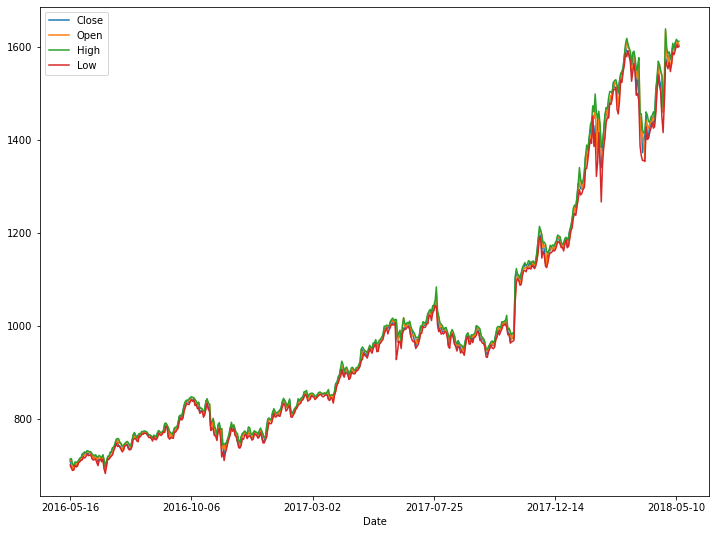

In [10]:
df_val = pd.read_csv("AMZN_val.csv")
analyse(df_val)

The validation set has the same properties as the training set: no null values, clear column types, and a valid date range. The stock has also continued to grow during this period.

Shape (504, 7) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB

               Open         High          Low        Close    Adj Close  \
count   504.000000   504.000000   504.000000   504.000000   504.000000   
mean   1823.927758  1843.069246  1803.067065  1824.040536  1824.040536   
std     178.129809   179.294163   177.457741   178.470078   178.470078   
min    1346.000000  1396.030029  1307.000000  1343.959961  13

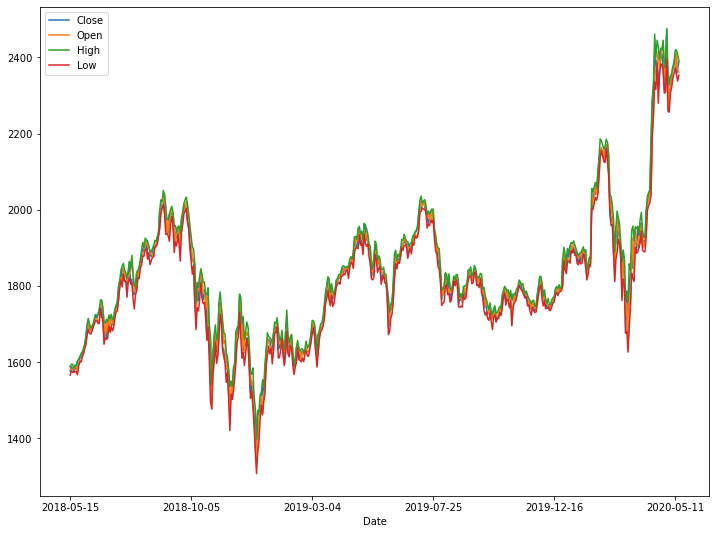

In [11]:
df_test = pd.read_csv("AMZN_test.csv")
analyse(df_test)

The same can be applied for the test set. However, the stock is more volatile in this period despite it growing.

Once the observation is done, let's move on to the predictive modeling part of the data. I want to predict if the next day's closing price will be higher than the opening price. However, we have to infer this as there isn't any information explicitly stated in the data. I just need to compare the closing and opening prices of the next day.

Hence, I will need to ensure that the data is sorted by date by using the `sort_values` method on the `Date` column, in ascending order.

Note to self: 

I need to shift the DataFrame by one row / one day and compare the prices. Pandas as a method known as the `shift` method. Specify a period of minus one (so that I shift the data from the next day back). Because it is a logical operation, Pandas would return a `True / False` result for each comparison. I want this to be represented as `1 / 0` for the machine learning models, so let's mal it to type `int`. To store all of this information, I will create a new column, `Target`.

In [12]:
# sort the data by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [13]:
# shift by a period of '-1' to take the next day's price prediction to current day
# a positive period of x will take the x days from the past
# fill_value is the scalar value to use for newly introduced missing values
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)

In [14]:
df_train

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,0
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,0
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,0
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,0
...,...,...,...,...,...,...,...,...
4776,2016-05-09,673.950012,686.979980,671.409973,679.750000,679.750000,3982200,1
4777,2016-05-10,694.000000,704.549988,693.500000,703.070007,703.070007,6105600,1
4778,2016-05-11,705.789978,719.000000,701.650024,713.229980,713.229980,7338200,1
4779,2016-05-12,717.380005,722.450012,711.510010,717.929993,717.929993,5048200,0


In [15]:
df_train["Target"].value_counts()

1    2392
0    2389
Name: Target, dtype: int64

There are `2292` days where the closing price is higher than the opening and `2389` where it is lower.

In [16]:
# repeat for validation and test set 
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"].value_counts()

0    255
1    248
Name: Target, dtype: int64

In [17]:
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"].value_counts()

1    255
0    249
Name: Target, dtype: int64

Before I start building some machine learning models to predict the target variable, I will explore some possibilities on doing feature engineering.

# Feature Engineering

Stock prices are time-dependent, meaning that the next day's price depends on prices (and many other things) from previous days.

I want to take into account all the values in the last `n` days, capturing the trend, or the magnitude of price change. This will be done by calculating a moving average (MA). An MA is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price. For each day `X`, the moving average of order `n` would be the arithmetic mean of the prices from the days `X-1`, `X-2`, ... , `X-n`.

Note to self:
Pandas has a method known as `rolling` which provides us an interferace for sliding (rolling) window calculations. The following cells calculate the 3- and 7- days MA, and add them as a feature into the data set.

In [18]:
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()
# window gives the size of the moving window
# min_periods gives the minimum number of observations in window required to have a value, otherwise np.nan

In [19]:
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

In [20]:
# current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [21]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

Display data with the new features included

In [22]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


# Machine Learning Algorithms

I will be exploring the `sklearn` library to implement my machine learning algorithms. 

1. Logistic regression
2. Decision tree
3. Random forest
4. Gradient boosting ensemble

All of these algorithms are implemented in the `sklearn.linear_model` module. All of them also share the same interface i.e., I can use the same procedure for implementing any of them.

After the fitting the data, evaluate their performance on the validation set by estimating the AUC metric.

Note to self: For easier manipulation, specify the target column and the feature (input) columns as lists.

In [23]:
# target column that we aim to predict
y_col = "Target"

# input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [24]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

## Logistic Regression

Similar to Linear Regression, but the output is modified with a sigmoid function. 

To calculate the AUC value and to plot the ROC curve, I will be using the `plot_roc_curve()` method from the `sklearn.metrics` module. 

In the essence of time, I will be using the default parameters for the models. Can explore different values and try to get better AUC in the future. 

In [25]:
# for reproducibility
RANDOM_SEED = 42

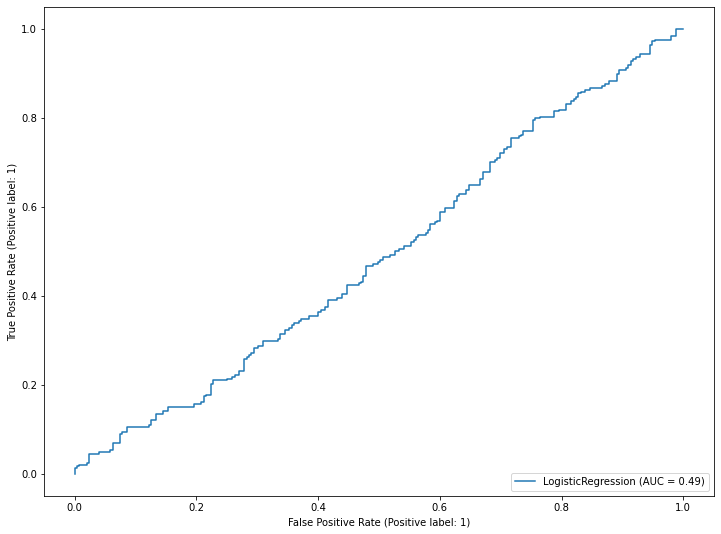

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
plot_roc_curve(lr, X_val, y_val)

Logistic regression does not work well for this problem. Having `AUC < 0.5` means that the classifier is worse than just randomly guessing the output.

## Decision Tree
Decision trees deal better with non-linear spaces, so they might be able to produce a better model than logistic regression.

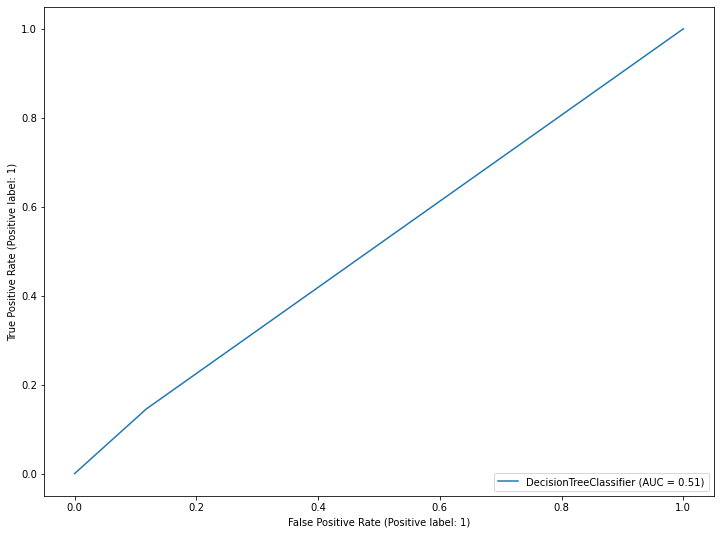

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=RANDOM_SEED)
dt.fit(X_train, y_train)

plot_roc_curve(dt, X_val, y_val)

The decision tree outperforms the logistic regression model by 0.02, with an AUC of 0.51.

## Random Forest

Random forest is an ensemble model that builds multiple decision trees, each with a different (random) sub-set of attributes. It is generally expected that an ensemble model would outperform a base learner (i.e., the combination of predictions from many decision trees would be better / more stable than the prediction of just one decision tree).

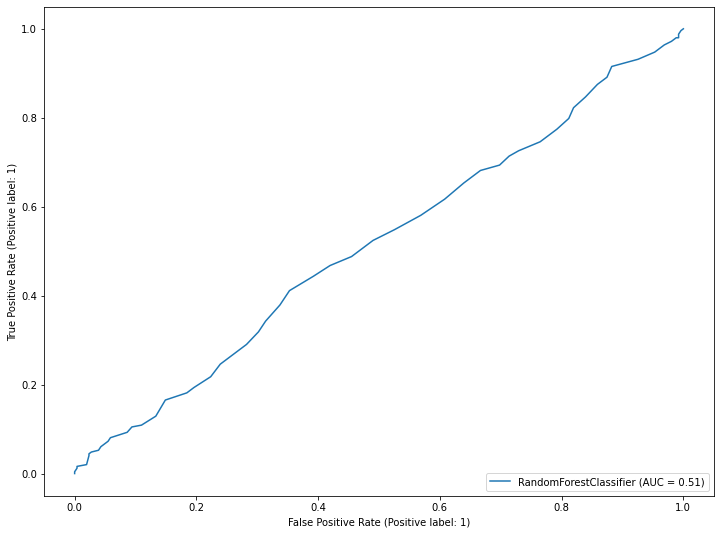

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=RANDOM_SEED)
rf.fit(X_train, y_train)

plot_roc_curve(rf, X_val, y_val)

Contrary to our expectations, the model does not outperform the decision tree, it actually performs the same.

## Gradient Boosting Ensemble

The last ensemble technique I will be trying is gradient boosting. This algorithm sets up the stage for the next part, where I will try a deep learning approach to solve the problem. A gradient boosting classifier is structurally the same as any ensemble learner - it is a collection of base learners. The algorithm induces (learns) the trees one by one, and in each iteration, it gives greater weight to those instances that were wrongly misclassified, so the next tree would "pay more attention" while training on them. Sometimes this can improve performance.

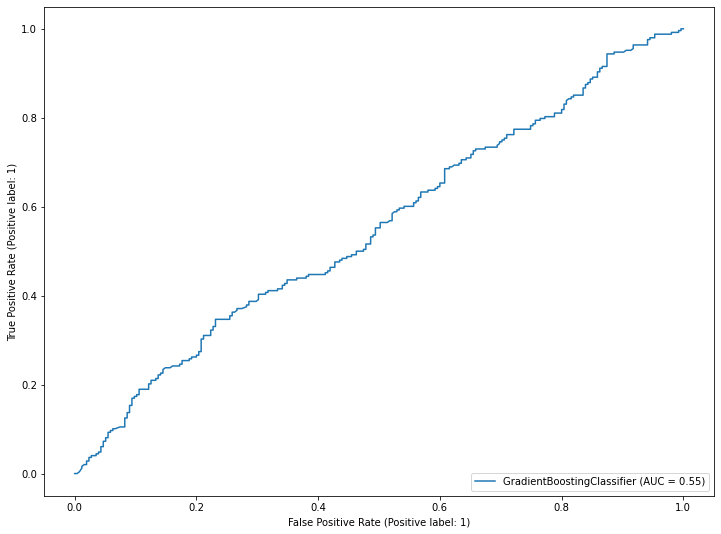

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=RANDOM_SEED)
gb.fit(X_train, y_train)

plot_roc_curve(gb, X_val, y_val)

The gradient boosting classifier outperforms previous models and scored 0.55 AUC.

It seems that gradient boosting works best for this data set. In the next section, I will train a deep learning model with an aim to outperform the baseline set here (AUC = 0.55).

# Deep Learning Algorithm
I will be using Google's open-source library Tensorflow for implementing a small neural network. 

In [30]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [31]:
import tensorflow as tf

tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.11.0


Keras is the most popular framework for designing deep learning models. In the next cell, I will implement a sequential neural network with:

1. Normalization layer that scales the data to a common range
2. A dense layer with 10 neurons and a ReLU activation function.
3. A dropout layer with a 0.2 probability of dropping a neuron.
4. Another dense layer with 5 neurons and ReLU activation function.
5. An output layer of just one neuron with a sigmoid activation function (the same one mentioned in the logistic regression part above)

Note to self: It is recommended that the model is small, otherwise, it will overfit very quickly.

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [33]:
# configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

I am going to train my model for 50 epochs, and keep track of its loss (binary_crossentropy) and AUC values during each epoch.

To prevent overfitting, I am implementing two callbacks (functions to be called after each epoch):

1. Learning rate scheduler that decays the learning rate as the number of epochs increases.
2. Early stopping callback that stops training if the loss does not improve after a certain number of epochs.

In [34]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [35]:
# the model.fit(...) method returns a 'history' object with stats about the training
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50
150/150 [==============================] - 1s 3ms/step - loss: 22.2373 - auc: 0.4897 - val_loss: 0.6934 - val_auc: 0.5026 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7106 - auc: 0.4885 - val_loss: 0.6954 - val_auc: 0.5116 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7148 - auc: 0.5034 - val_loss: 0.6931 - val_auc: 0.5102 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7049 - auc: 0.5145 - val_loss: 0.7048 - val_auc: 0.4915 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6993 - auc: 0.4940 - val_loss: 0.6931 - val_auc: 0.5054 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 1ms/step - loss: 0.7039 - auc: 0.5045 - val_loss: 0.6939 - val_auc: 0.5141 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 1ms/step - loss: 0.6979 - auc: 0.5026 - val_loss: 0.6931 - val_auc: 

The model has trained for 50 epochs. I can see the change in the learning rate, which is due to the learning rate scheduler callback that I have implemented. The early stopping callback fired, at the 31st epoch, which means that the validation loss has not been improving over time. However, I observe that both the training and the validation AUC are very close to 0.5, improving the overall score only over the logistic regression model.

In [36]:
# get the overview of the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 10)               21        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 192
Trainable params: 171
Non-trainable params: 21
_________________________________________________________

Below, I plot the train and validation loss and AUC values as a function of the epoch. I used the matplotlib library, and the history object to do that.

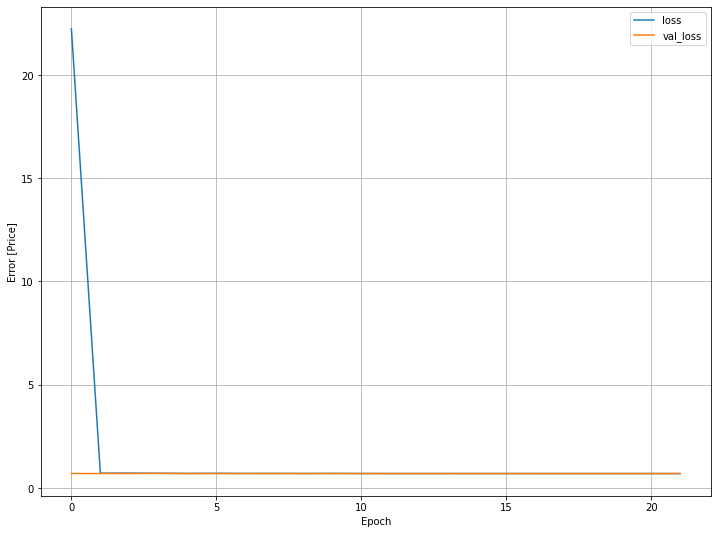

In [37]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

The training loss starts high, falls steeply after the first epoch, and then remains pretty much equal, with very little improvement over time. The validation loss does not change, implying that the model is overfitting the training data. There are many possible reasons for this: too complex model, small data set, features that are not predictive, etc. The same situation is observed for the AUC metric in the plot below. The training AUC does vary, reaching its highest point at around `0.5108` in the first epoch, but the validation AUC remains fixed at `0.5000`.

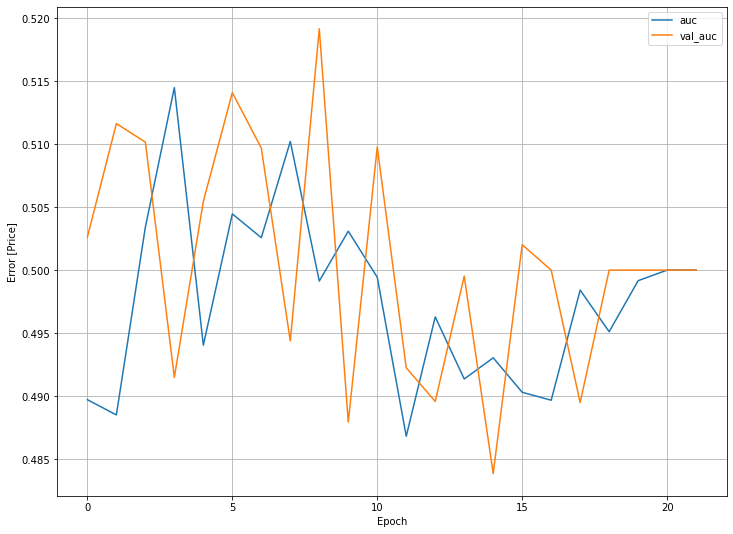

In [38]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

# Conclusion
The gradient boosting classifier provided the best AUC score on the validation set. 

In the next cell, I am going to evaluate the performance of the gradient boosting classifier on the test set. This is done by calling plot_roc_curve with the test set.

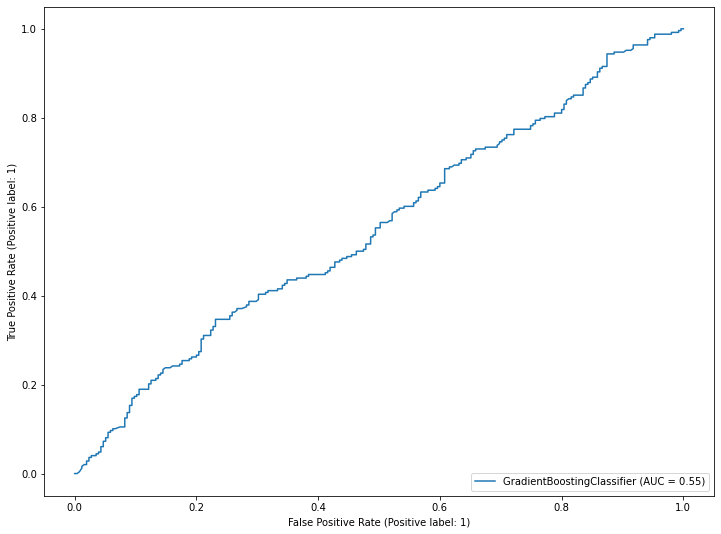

In [39]:
plot_roc_curve(gb, X_test, y_test)

I am showing a feature importance plot, which plots the importance of each feature with regards to the predictive performance of the model (the higher the value the more important the feature is for determining the value of the target variable).

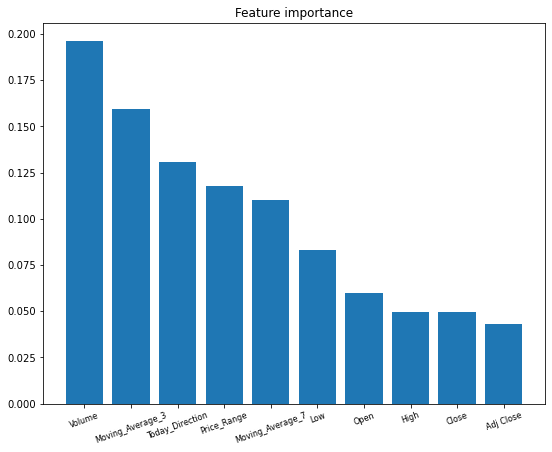

In [40]:
import numpy as np

# calculate feature importances
importances = gb.feature_importances_

# sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# rearrange feature names so they match the sorted feature importances
names = [df_train[X_cols].columns[i] for i in indices]

feat = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
feat = plt.title("Feature importance")
feat = plt.xticks(rotation=20, fontsize = 8)